# Classification 

-------------

## Exercise

This question should be answered using the `Weekly` data set. This data is similar in nature to the `Smarket` data from earlier, except that it contains 1,089
weekly returns for 21 years, from the beginning of 1990 to the end of
2010.

1. Produce some numerical and graphical summaries of the `Weekly`
data. Do there appear to be any patterns?

2. Use the full data set to perform a logistic regression with
`Direction` as the response and the five lag variables plus `Volume`
as predictors. Use the summary function to print the results. Do
any of the predictors appear to be statistically significant? If so,
which ones?

3. Compute the confusion matrix and overall fraction of correct
predictions. Explain what the confusion matrix is telling you
about the types of mistakes made by logistic regression.

4. Now fit the logistic regression model using a training data period
from 1990 to 2008, with `Lag2` as the only predictor. Compute the
confusion matrix and the overall fraction of correct predictions
for the held out data (that is, the data from 2009 and 2010).

5. Repeat (4) using LDA.
6. Repeat (4) using QDA.
7. Repeat (4) using KNN with K = 1.
8. Which of these methods appears to provide the best results on
this data?

9. Experiment with different combinations of predictors, including
possible transformations and interactions, for each of the
methods. Report the variables, method, and associated confusion
matrix that appears to provide the best results on the held
out data. Note that you should

In [2]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
% matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier

In [18]:
weekly = pd.read_csv("Weekly.csv")

In [28]:
#weekly.index = weekly['Unnamed: 0']
#del(weekly['Unnamed: 0'])
print(weekly.info())
print(weekly.head())
weekly.columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1089 entries, 1 to 1089
Data columns (total 9 columns):
Year         1089 non-null int64
Lag1         1089 non-null float64
Lag2         1089 non-null float64
Lag3         1089 non-null float64
Lag4         1089 non-null float64
Lag5         1089 non-null float64
Volume       1089 non-null float64
Today        1089 non-null float64
Direction    1089 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 85.1+ KB
None
            Year   Lag1   Lag2   Lag3   Lag4   Lag5    Volume  Today Direction
Unnamed: 0                                                                    
1           1990  0.816  1.572 -3.936 -0.229 -3.484  0.154976 -0.270      Down
2           1990 -0.270  0.816  1.572 -3.936 -0.229  0.148574 -2.576      Down
3           1990 -2.576 -0.270  0.816  1.572 -3.936  0.159837  3.514        Up
4           1990  3.514 -2.576 -0.270  0.816  1.572  0.161630  0.712        Up
5           1990  0.712  3.514 -2.576 -0

Index(['Year', 'Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5', 'Volume', 'Today',
       'Direction'],
      dtype='object')

In [16]:
weekly.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


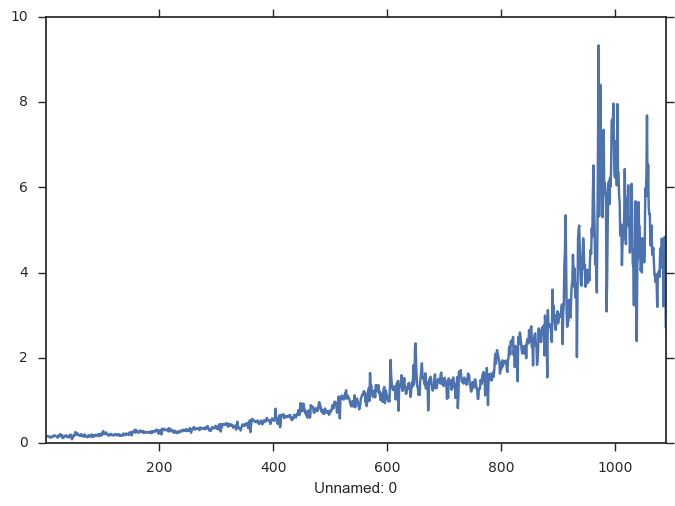

In [38]:
weekly['Volume'].plot()

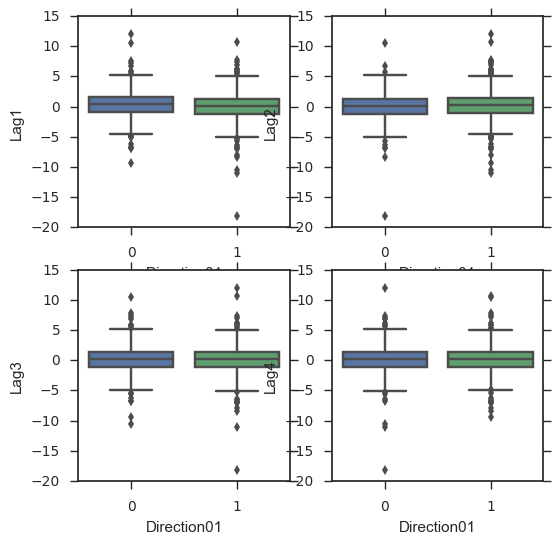

In [49]:
plt.figure(figsize= (6,6))
plt.subplot(2, 2, 1)
sns.boxplot("Direction01", "Lag1", data=weekly)
plt.subplot(2, 2, 2)
sns.boxplot("Direction01", "Lag2", data=weekly)
plt.subplot(2, 2, 3)
sns.boxplot("Direction01", "Lag3", data=weekly)
plt.subplot(2, 2, 4)
sns.boxplot("Direction01", "Lag4", data=weekly)

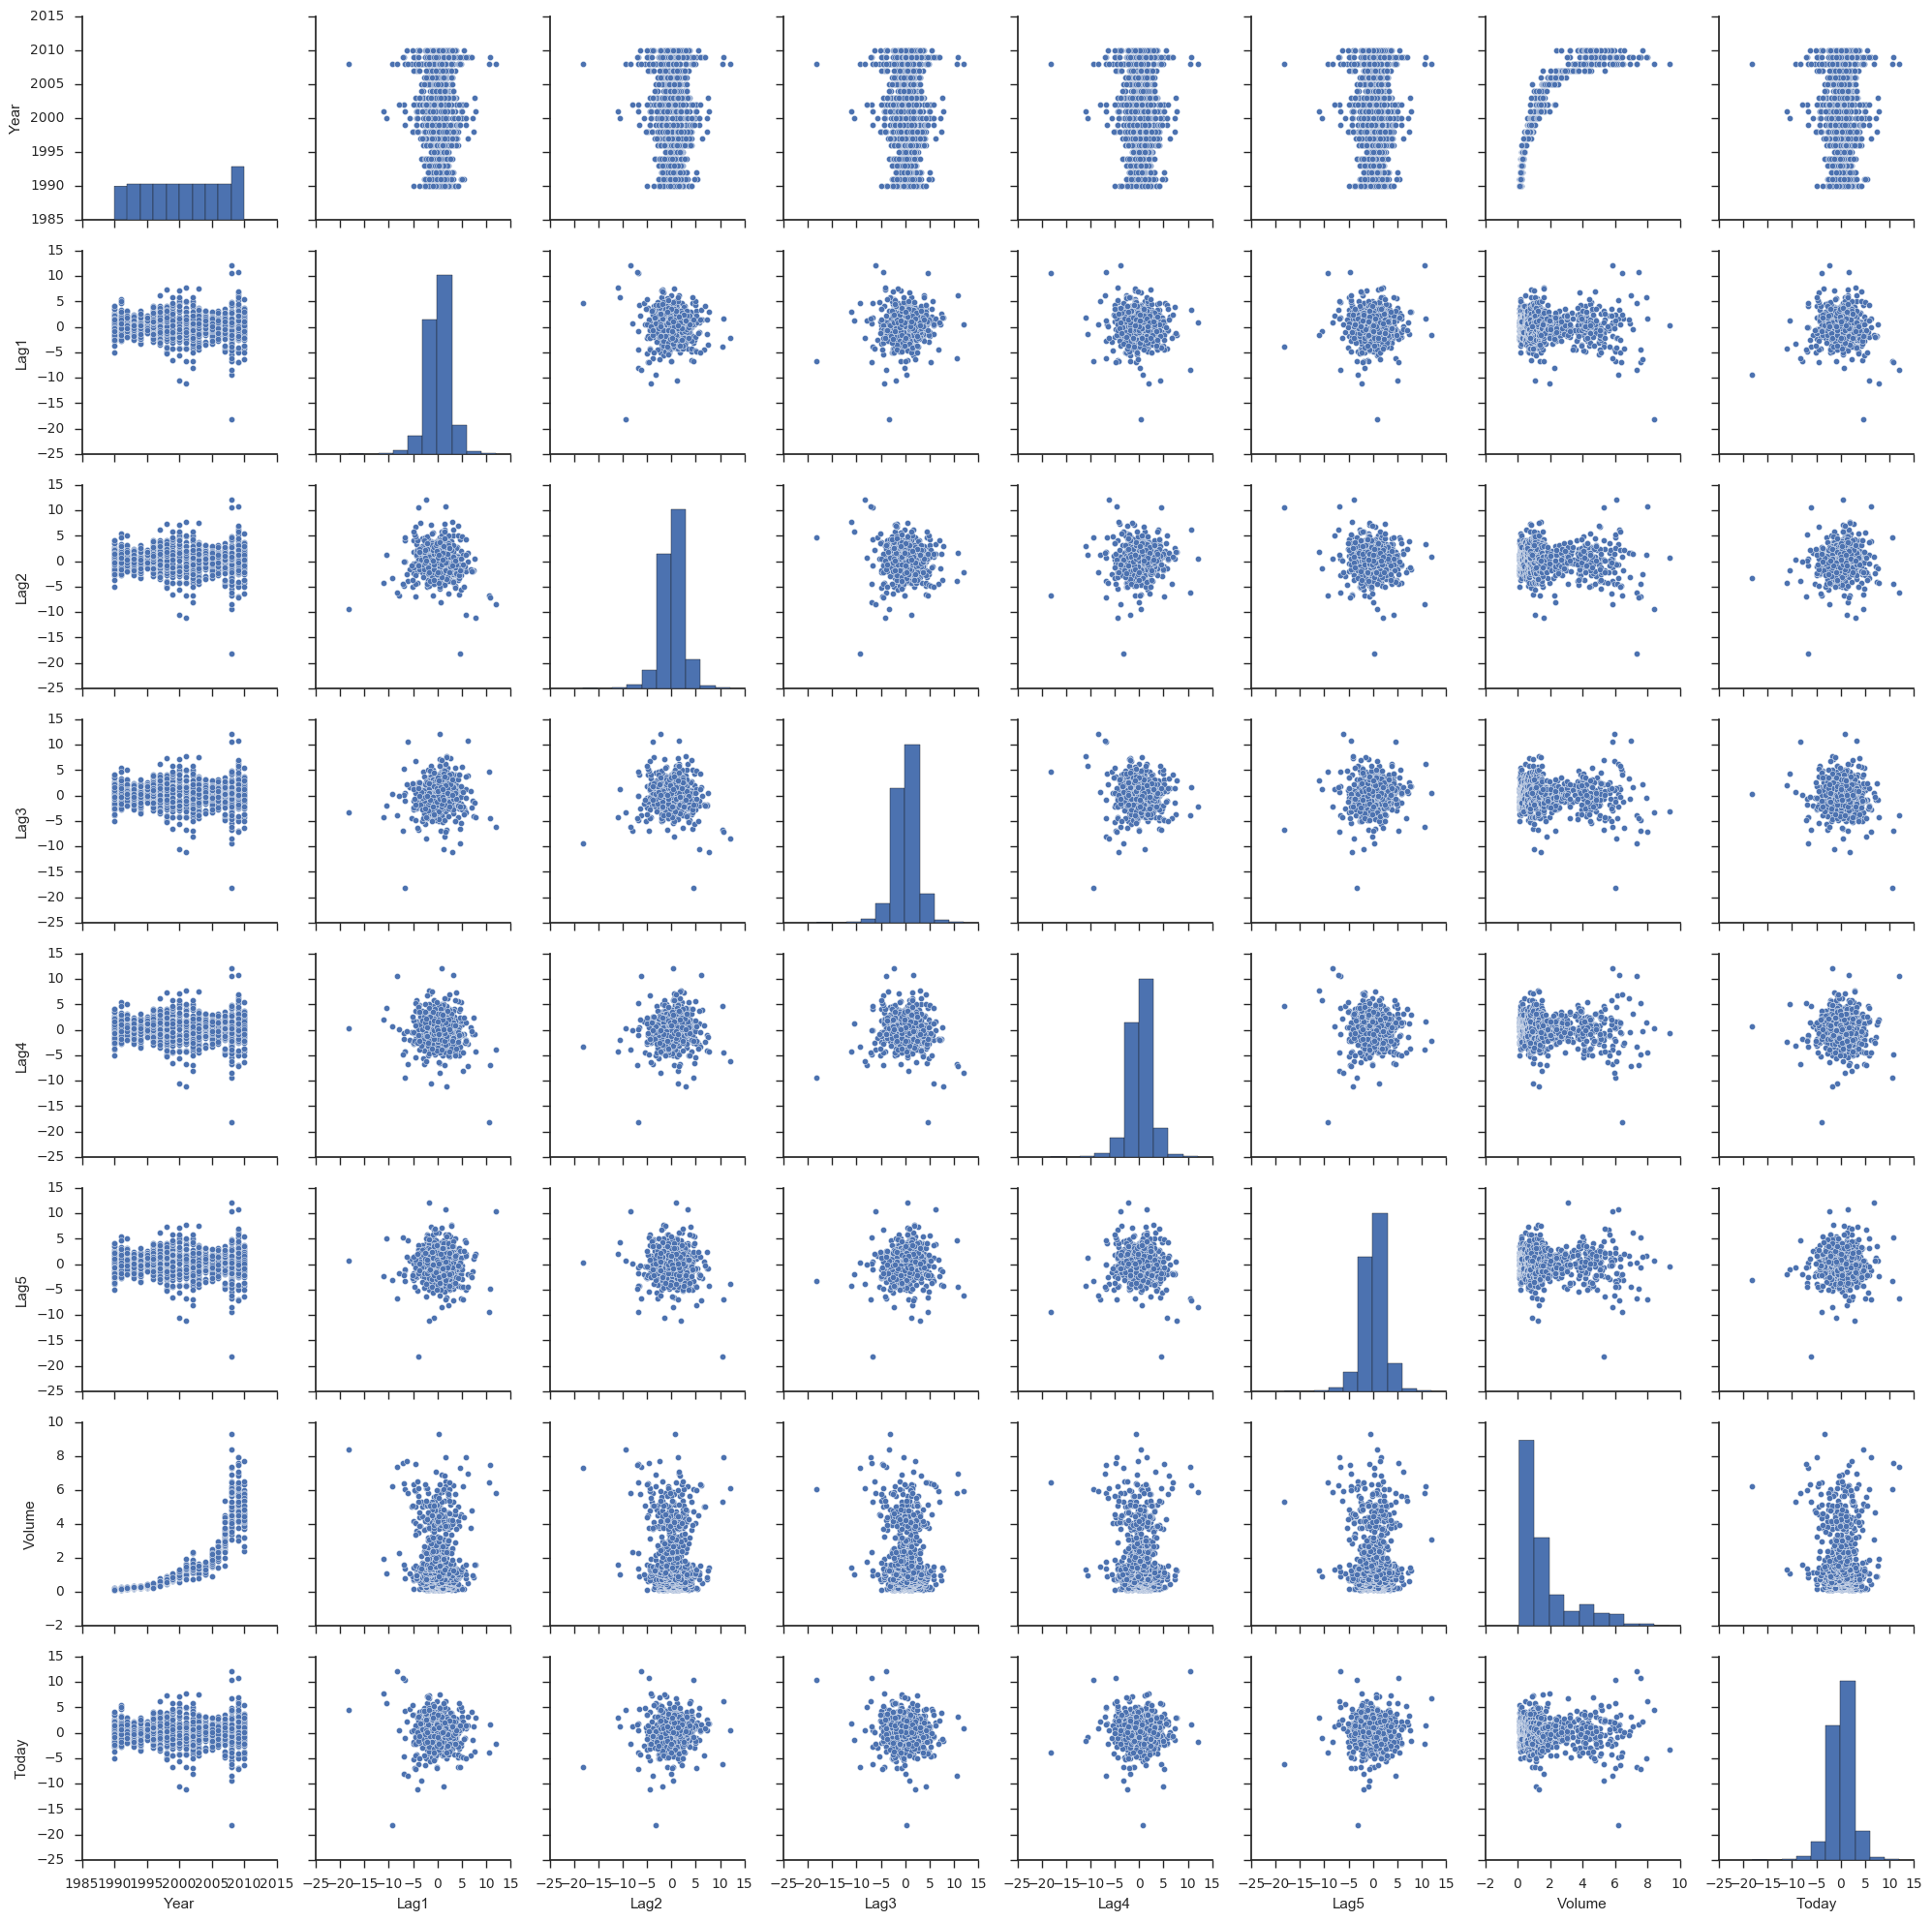

In [26]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(weekly)
g
# Year and Volume are correlated...otherwise fairly random

In [62]:
#weekly["Direction01"] = np.where(weekly["Direction"] == "Up", 1, 0)
weekly.head()
#predictors = weekly.drop(["Direction","Direction01"], axis=0)
results = smf.logit("Direction01~ Lag1+ Lag2+ Lag3+ Lag4 +Volume", data=weekly).fit()

Optimization terminated successfully.
         Current function value: 0.682580
         Iterations 4


In [63]:
results.summary()
# Lag 2 shows a statistically significant relationship

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            Direction01   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1083
Method:                           MLE   Df Model:                            5
Date:                Sun, 12 Mar 2017   Pseudo R-squ.:                0.006379
Time:                        13:11:38   Log-Likelihood:                -743.33
converged:                       True   LL-Null:                       -748.10
                                        LLR p-value:                   0.08924
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.2625      0.086      3.069      0.002         0.095     0.430
Lag1          -0.0408      0.026     -1.548      0.122        -0.093     0.011
Lag2           0.0593      0.027      2.214      0.027         0.007     0.112
Lag3          -0.0166      0.027     -0.624      0.532        -0.069     0.036
Lag4          -0.0267      0.026     -1.012      0.312        -0.078     0.025
Volume        -0.0215      0.037     -0.584      0.559        -0.094     0.051
==============================================================================
"""

In [64]:
predictions = np.where(results.predict(weekly) >.5,1,0)
confusion_matrix(weekly['Direction01'], predictions)

array([[ 55, 429],
       [ 45, 560]])

In [66]:
total = (55 +429+45 + 560)
correct = (55 + 560)
error =(429+45)

print("Correct Rate: ", correct/total)
print("Error Rate: ", error/total)

# Model predicting much higher frequency of up days (1's) than occured, increasing false positive, lowering
#Specificity and resulting in a large percent of Type 1 erros

Correct Rate:  0.5647382920110193
Error Rate:  0.43526170798898073


In [77]:
year_bool = weekly['Year'] <2009
x_train = weekly[year_bool]['Lag2'].values.reshape(-1,1)
x_test = weekly[~year_bool]['Lag2'].values.reshape(-1,1)
y_train = weekly[year_bool]['Direction01'].values
y_test = weekly[~year_bool]['Direction01'].values

In [78]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

confusion_matrix(y_test, lr.predict(x_test))

array([[ 9, 34],
       [ 5, 56]])

In [79]:
total = (9+34+5+56)
correct = (56 + 9)
error =(34+5)

print("Correct Rate: ", correct/total)
print("Error Rate: ", error/total)

# Although an imporovement over the last, model still predicting higher frequency of up days (1's) than occured, increasing false positive, lowering
#Specificity and resulting in a large percent of Type 1 erros

Correct Rate:  0.625
Error Rate:  0.375


In [81]:
lda= LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)

confusion_matrix(y_test, lda.predict(x_test))

array([[ 9, 34],
       [ 5, 56]])

In [83]:
qda= QuadraticDiscriminantAnalysis()
qda.fit(x_train, y_train)

confusion_matrix(y_test, qda.predict(x_test))

array([[ 0, 43],
       [ 0, 61]])

In [85]:
knn= KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)

confusion_matrix(y_test, knn.predict(x_test))

array([[21, 22],
       [31, 30]])

In [ ]:
# Traditional Logistic Regression and LDA provide the best results

In [111]:
results = smf.logit("Direction01~ Lag1+ Lag2 +Volume", data=weekly).fit()
predictions = np.where(results.predict(weekly) >.5,1,0)
cm =confusion_matrix(weekly['Direction01'], predictions)
sensitivty= cm[1][1]/sum(cm[1])
specificivty= cm[0][0]/sum(cm[0])

print(sensitivty, specificivty)
print("Max Simple Addition of Sensitivity & Sensitivity Occurs Using Lags 1 & 2: ", sensitivty+ specificivty)


Optimization terminated successfully.
         Current function value: 0.683186
         Iterations 4
0.933884297521 0.0971074380165
Max Simple Addition of Sensitivity & Sensitivity Occurs Using Lags 1 & 2:  1.03099173554


## Exercise 

In this problem, you will develop a model to predict whether a given
car gets high or low gas mileage based on the Auto data set.

1. Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains
a value above its median, and a 0 if `mpg` contains a value below
its median. 

2. Explore the data graphically in order to investigate the association
between `mpg01` and the other features. Which of the other
features seem most likely to be useful in predicting `mpg01`? Scatterplots
and boxplots may be useful tools to answer this question.
Describe your findings.

3. Split the data into a training set and a test set.

4. Perform LDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
(2). What is the test error of the model obtained?

5. Perform QDA on the training data in order to predict `mpg01`
using the variables that seemed most associated with `mpg01` in
(2). What is the test error of the model obtained?

6. Perform logistic regression on the training data in order to predict
`mpg01` using the variables that seemed most associated with
`mpg01` in (2). What is the test error of the model obtained?

7. Perform KNN on the training data, with several values of K, in
order to predict `mpg01`. Use only the variables that seemed most
associated with `mpg01` in (2). What test errors do you obtain?
Which value of K seems to perform the best on this data set?

In [117]:
auto = pd.read_csv("Auto (2).csv")
#print(auto.info)
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [120]:
auto['mpg01'] = np.where(auto['mpg'] > auto['mpg'].median(),1,0)

In [122]:
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


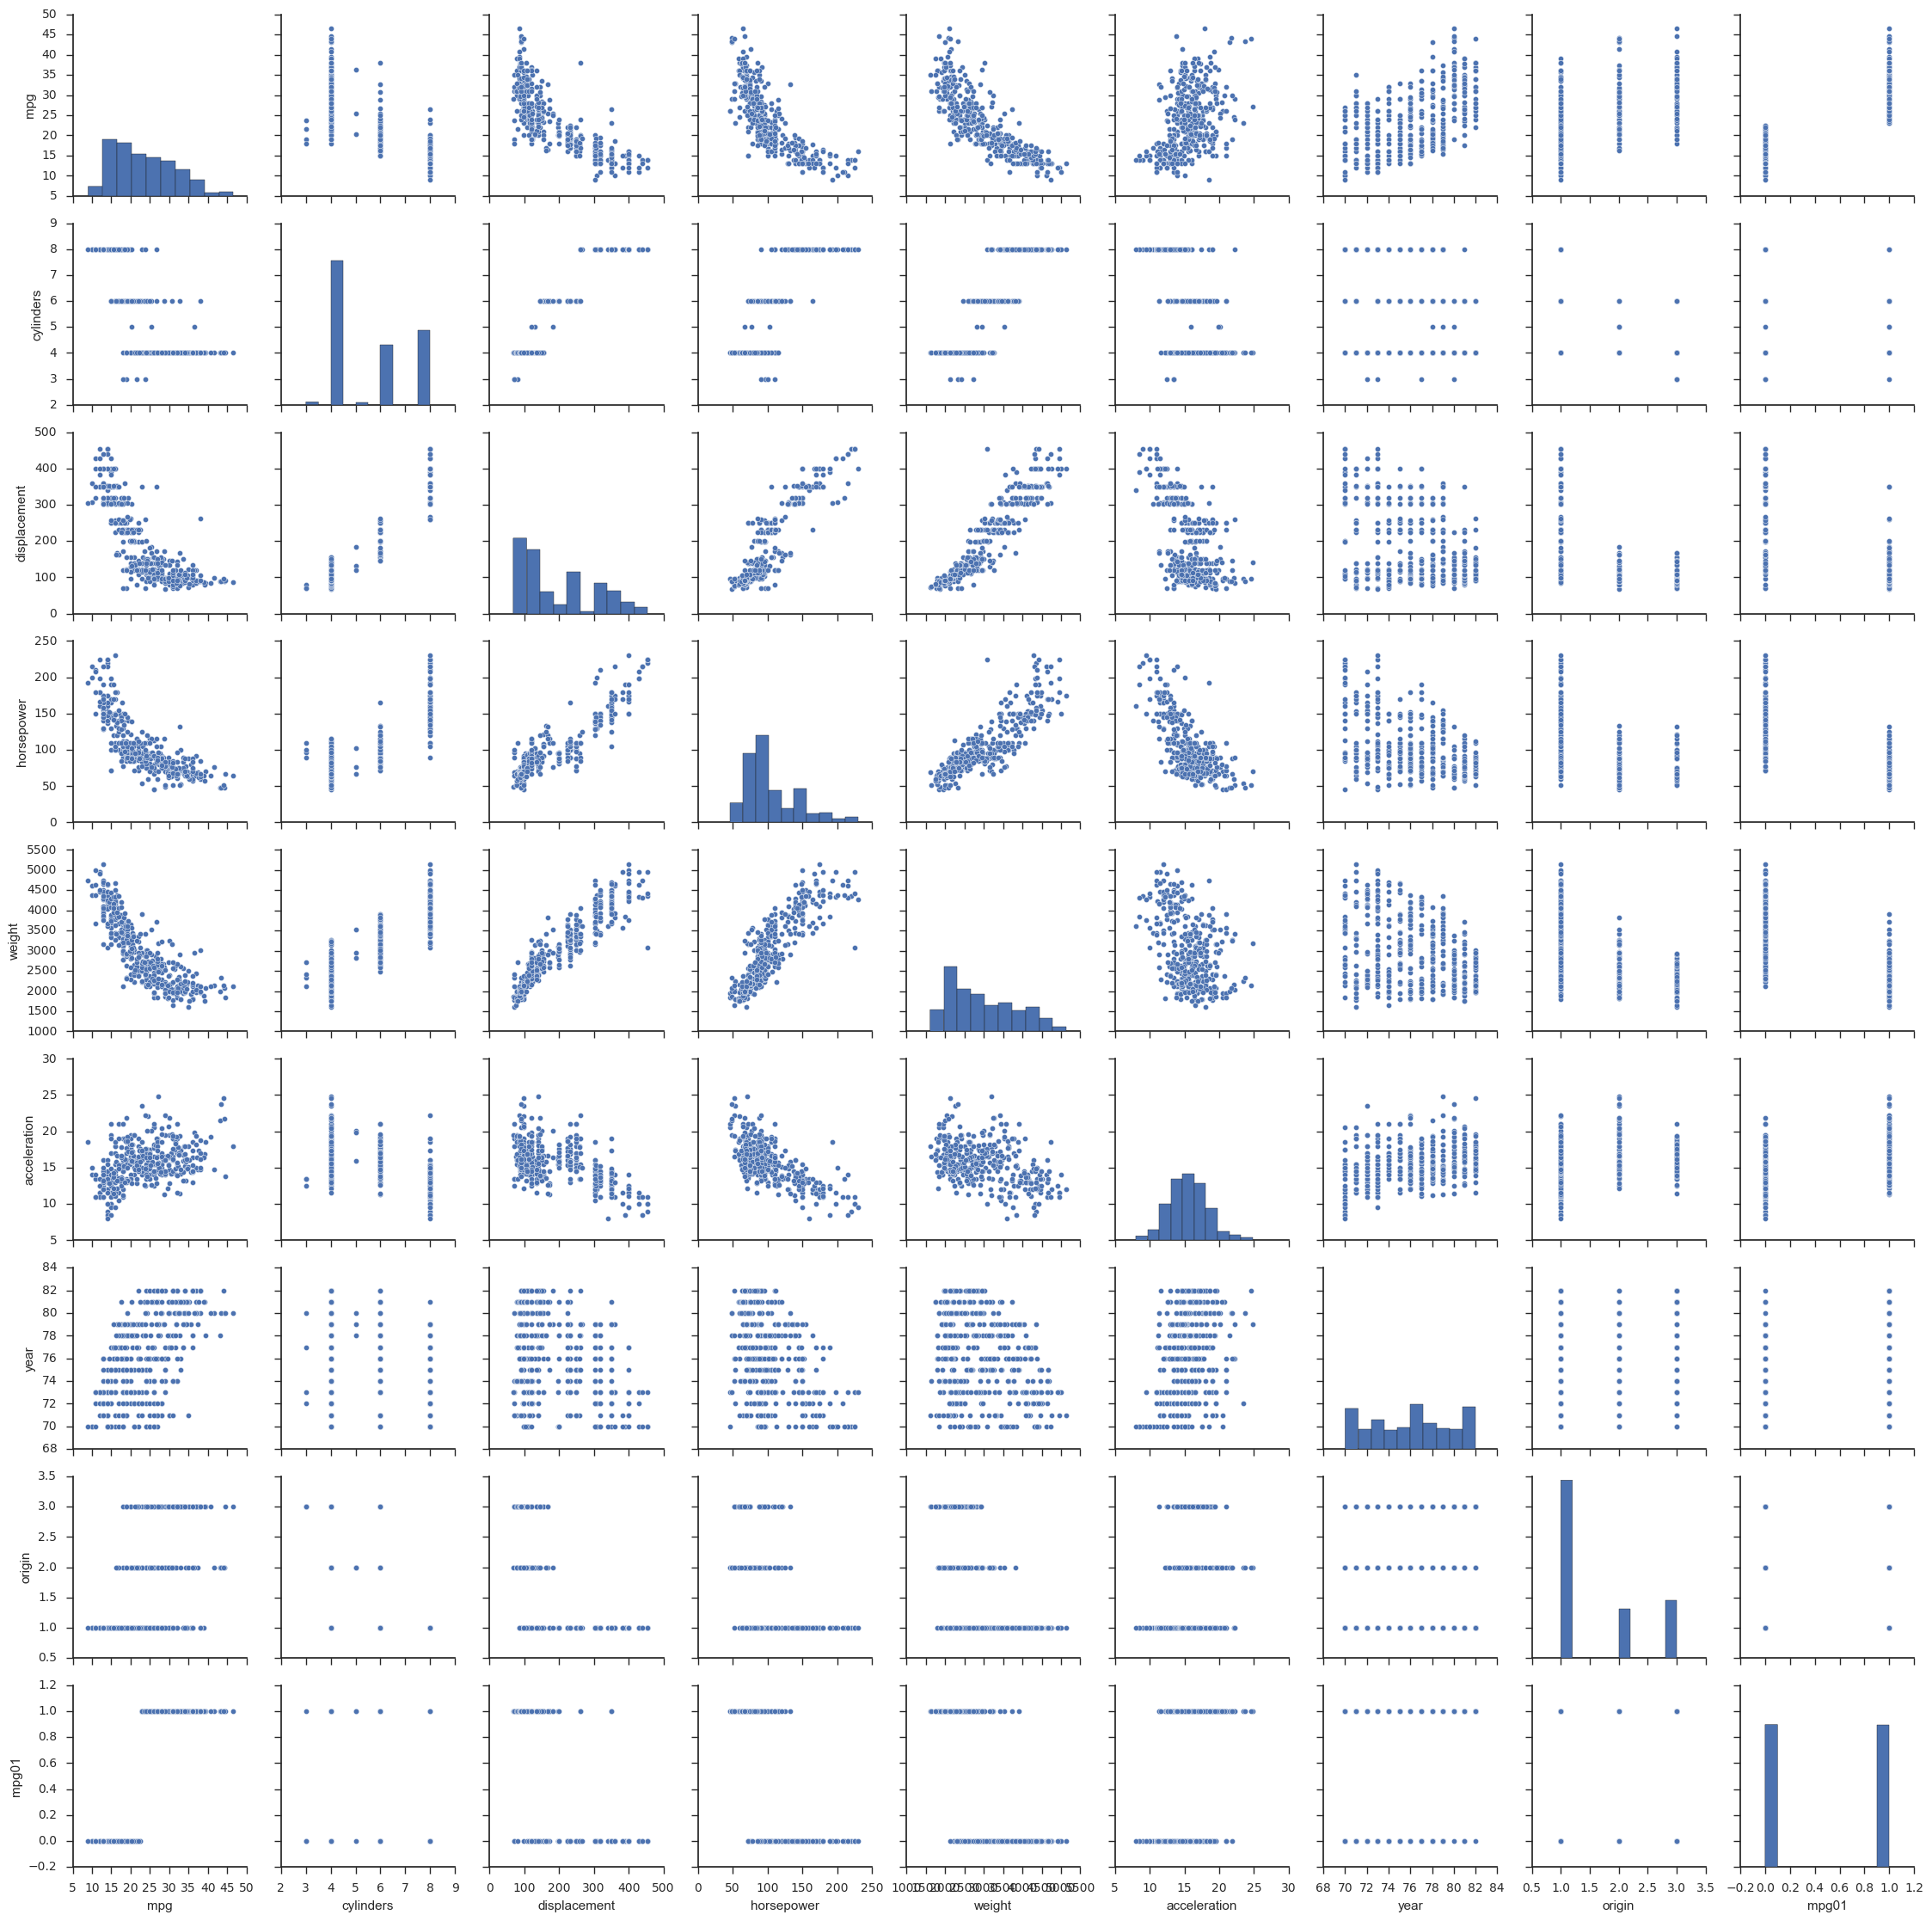

In [124]:
sns.pairplot(auto)

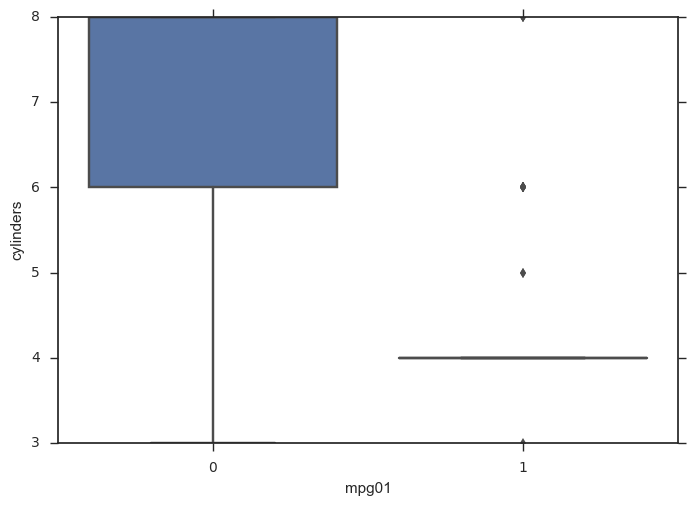

In [125]:
sns.boxplot(x= auto["mpg01"], y = auto['cylinders'])

In [128]:
train, test= train_test_split(auto[['mpg01', 'cylinders', 'displacement', 'horsepower', 'weight']], 
                              test_size= .5, random_state=0)

In [131]:
train_x = train.drop('mpg01', 1)
test_x = train.drop('mpg01', 1)
train_y = train['mpg01']
test_y = train['mpg01']

In [134]:
print(len(train_x))
print(len(test_x))
print(len(train_y))
print(len(test_y))

196
196
196
196


In [135]:
lda= LinearDiscriminantAnalysis()
lda.fit(train_x, train_y)
confusion_matrix(test_y, lda.predict(test_x))

array([[82, 14],
       [ 6, 94]])

In [138]:
# Accuracy Rate
print(lda.score(test_x, test_y))
# Error Rate
1- lda.score(test_x, test_y)

0.897959183673


0.10204081632653061

In [140]:
lr= LogisticRegression()
lr.fit(train_x, train_y)

confusion_matrix(test_y, lr.predict(test_x))

array([[80, 16],
       [ 9, 91]])

In [141]:
# Accuracy Rate
print(lr.score(test_x, test_y))
# Error Rate
1- lr.score(test_x, test_y)

0.872448979592


0.12755102040816324

In [144]:
knn= KNeighborsClassifier(n_neighbors= 1)
knn.fit(train_x, train_y)

confusion_matrix(test_y, knn.predict(test_x))

array([[ 96,   0],
       [  0, 100]])

In [145]:
# Hmmm... not sure how this reports a perfect score
# Accuracy Rate
print(knn.score(test_x, test_y))
# Error Rate
1- knn.score(test_x, test_y)

1.0


0.0

## Excercise

Using the `Boston` data set, fit classification models in order to predict
whether a given suburb has a crime rate above or below the median.
Explore logistic regression, LDA, and KNN models using various subsets
of the predictors. Describe your findings.

In [149]:
boston = pd.read_csv("Boston (2).csv", index_col=0)
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [150]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [152]:
boston['crim01'] = np.where(boston['crim'] > boston['crim'].median(), 1,0)

In [160]:
boston.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim01
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.608741


In [163]:
ccr songs


Optimization terminated successfully.
         Current function value: 0.442812
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 crim01   No. Observations:                  506
Model:                          Logit   Df Residuals:                      503
Method:                           MLE   Df Model:                            2
Date:                Sun, 12 Mar 2017   Pseudo R-squ.:                  0.3612
Time:                        15:14:47   Log-Likelihood:                -224.06
converged:                       True   LL-Null:                       -350.73
                                        LLR p-value:                 9.730e-56
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -4.0797      0.375    -10.882      0.000        -4.815    -3.345
indus          0.1204      0.022      5.525      0.000         0.078     0.163
tax            0.0073      0.001      6.308      0.000         0.005     0.010
==============================================================================
"""

In [167]:
train, test = train_test_split(boston[['indus', 'tax', 'crim01']],
                                test_size = .5, random_state=0)

In [169]:
train_x = train.drop('crim01', 1)
train_y = train['crim01']
test_x = test.drop('crim01', 1)
test_y = test['crim01']

In [171]:
#confusion_matrix(test_y, lr.predict(test_x))
lr = LogisticRegression()
lr.fit(train_x, train_y)

confusion_matrix(test_y, lr.predict(test_x))

array([[108,  13],
       [ 38,  94]])

In [172]:
# Not bad for 2 predictor model, tho not great either.
# Accuracy Rate
print(lr.score(test_x, test_y))
# Error Rate
1- lr.score(test_x, test_y)

0.798418972332


0.20158102766798414

In [177]:
ld = LinearDiscriminantAnalysis()
ld.fit(train_x, train_y)

confusion_matrix(test_y, ld.predict(test_x))

array([[111,  10],
       [ 39,  93]])

In [178]:
# Slightly Better
# Accuracy Rate
print(ld.score(test_x, test_y))
# Error Rate
1- ld.score(test_x, test_y)

0.806324110672


0.19367588932806323

In [180]:
# Throwing in a few more predictors to test KNN
train, test = train_test_split(boston[['indus', 'tax', 'crim01', 'medv', 'lstat']],
                                test_size = .5, random_state=0)

In [181]:
train_x = train.drop('crim01', 1)
train_y = train['crim01']
test_x = test.drop('crim01', 1)
test_y = test['crim01']

In [185]:
knn = KNeighborsClassifier(n_neighbors =1)
knn.fit(train_x, train_y)

confusion_matrix(test_y, knn.predict(test_x))


array([[111,  10],
       [ 14, 118]])

In [187]:
# Much more predictive when adding predictors
# Accuracy Rate
print(knn.score(test_x, test_y))
# Error Rate
1- knn.score(test_x, test_y)

0.905138339921


0.094861660079051391